In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

### 문제 정의 (목표 설정)
- 8천여개의 버섯 데이터를 활용해서 먹을 수 있는지 못먹는지 분류를 해보자.
- 결정트리 모델을 학습 평가 해보고 시각화까지 진행해보자.
- 예측 관여율이 높은 데이터를 확인해보자.

### 데이터 수집

In [2]:
data = pd.read_csv("./data/mushroom.csv", delimiter=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [3]:
data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.describe().T

,count,unique,top,freq
poisonous,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


- 문자형 데이터는 수치형 데이터와는 다른 통계치가 나온다.
- top : 해당 컬럼에서 가장 많은 수를 차지하는 데이터
- freq : top에 해당하는 데이터의 갯수

### EDA
- 데이터에서 인사이트 찾아내는 단계

In [5]:
# matplotlib 라이브러리가 시각화의 기본이라고 말한다면
# seaborn 라이브러리는 다른 라이브러리와 호환가능 하면서 더 깔끔한 모습을 보임
import seaborn as sns

<Axes: xlabel='cap-shape', ylabel='count'>

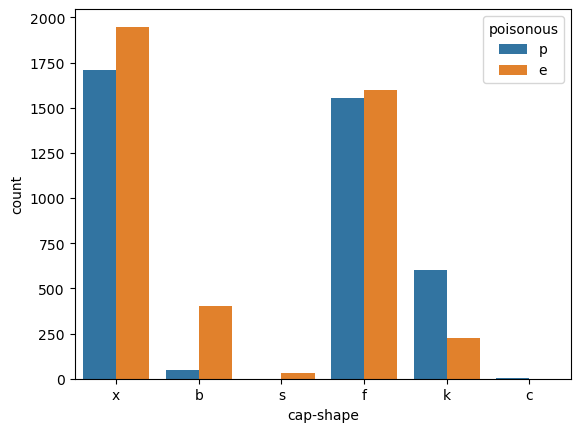

In [6]:
# countplot : 막대그래프, bar chart
sns.countplot(data = data,
              x = 'cap-shape', # x축에 들어갈 특성
              hue = 'poisonous' # 해당 컬럼의 값들 갯수가 bar chart로 출력됨
             )


 - 1. s는 전체 식용, c는 전체 독버섯
 - 2. b는 대부분이 식용, k는 대부분이 독성
 - 3. x와 f는 많은 지분을 차지하고 있구나

<Axes: xlabel='cap-surface', ylabel='count'>

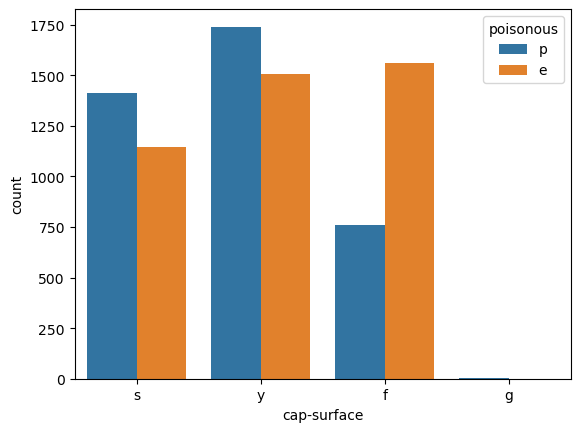

In [7]:
# countplot : 막대그래프, bar chart
sns.countplot(data = data,
              x = 'cap-surface', # x축에 들어갈 특성
              hue = 'poisonous' # 해당 컬럼의 값들 갯수가 bar chart로 출력됨
             )

<Axes: xlabel='ring-type', ylabel='count'>

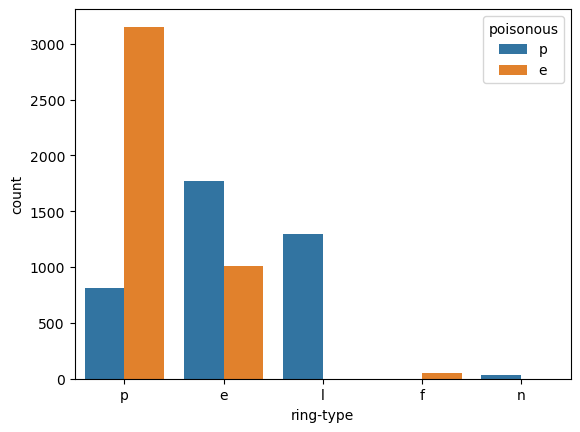

In [8]:
# countplot : 막대그래프, bar chart
sns.countplot(data = data,
              x = 'ring-type', # x축에 들어갈 특성
              hue = 'poisonous' # 해당 컬럼의 값들 갯수가 bar chart로 출력됨
             )

<Axes: xlabel='cap-color', ylabel='count'>

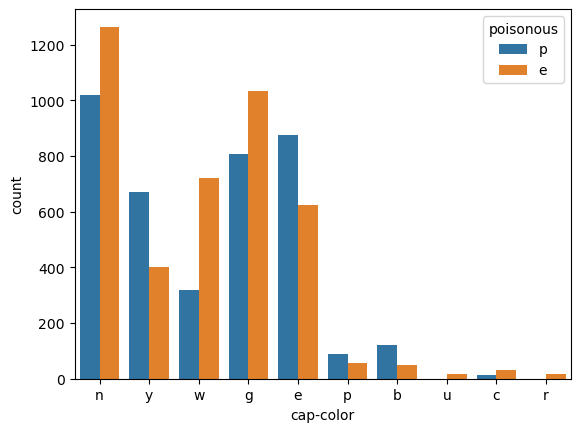

In [9]:
# countplot : 막대그래프, bar chart
sns.countplot(data = data,
              x = 'cap-color', # x축에 들어갈 특성
              hue = 'poisonous' # 해당 컬럼의 값들 갯수가 bar chart로 출력됨
             )

### 모델링
- 데이터 분리 / 모델 선택 / 하이퍼 파라미터 튜닝 / 학습 / 평가 / 시각화

In [10]:
# 데이터 분리
# 1. 문제와 정답 분리
X = data.iloc[:, 1:]
y =  data.iloc[:, 0]
X.shape, y.shape

((8124, 22), (8124,))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5686, 22), (2438, 22), (5686,), (2438,))

In [13]:
tree_mush01 = DecisionTreeClassifier() # 기본 모델

In [14]:
tree_mush01.fit(X_train, y_train)

ValueError: could not convert string to float: 'f'

- 머신러닝 모델은 숫자로 값을 입력받기를 기대한다.
- 문자값을 넣어주면 작동을 하지 못한다.
- 그래서 문자값을 숫자로 바꿔주는 인코딩이라는 작업이 필요하다.

**인코딩(encoding)**
- 범주형의 데이터를 수치형의 데이터로 바꿔주는 방법



**바이닝(bining)**
- 수치형의 데이터를 범주형으로 바꿔주는 방법

In [15]:
# 1. Label 인코딩
# 특성에 유니크한 값의 갯수에 따라 숫자를 1씩 증가시켜 mapping 해주는 방법
# 주의사항) 회귀파트에서는 사용 불가 - 숫자에 따른 순서나 중요도 인식가능성 있음

In [16]:
# 예시)
X['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [17]:
# Before
X['cap-shape']

0       x
1       x
2       b
3       x
4       x
       ..
8119    k
8120    x
8121    f
8122    k
8123    x
Name: cap-shape, Length: 8124, dtype: object

In [18]:
X['cap-shape'].map({'x' : 0, 'b' : 1, 's' : 2, 'f' : 3, 'k' : 4, 'c' : 5})

0       0
1       0
2       1
3       0
4       0
       ..
8119    4
8120    0
8121    3
8122    4
8123    0
Name: cap-shape, Length: 8124, dtype: int64

In [19]:
encoder = LabelEncoder()

encoder.fit(X['cap-shape'])

label = encoder.transform(X['cap-shape'])
label

array([5, 5, 0, ..., 2, 3, 5])

**원핫 인코딩**
- 모든 데이터를 0과 1로 변호나 -> 레이블에 유니크 값만큼 컬럼을 생성한 후 해당하는 데이터는 1 해당하지 않으면 0
- 컴퓨터는 2진법으로 모든 것들을 처리함. 일반적으로 레이블 인코딩 보다는 직관적으로 이해하기 쉬운 원핫인코딩을 조금 더 많이 사용

In [20]:
# 예시
temp = pd.get_dummies(X[['cap-shape', 'cap-surface']])
temp

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y
0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0
8120,0,0,0,0,0,1,0,0,1,0
8121,0,0,1,0,0,0,0,0,1,0
8122,0,0,0,1,0,0,0,0,0,1


### 인코딩을 이용해서 에러를 해결해보자
- 원핫 인코딩 사용하기

In [21]:
X_one_hot = pd.get_dummies(X)

### 데이터 전처리 및 변환시 주의점
- 훈련셋과 평가셋을 전처리할때 같은 방법으로 전처리가 진행되어야 한다.(필수)
- 예시) 훈련용 문제데이터는 원핫인코딩 / 평가용 문제데이터엔 레이블 인코딩을 적용한 경우

In [22]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y,
                                                   test_size=0.3,
                                                   random_state=14)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5686, 117), (2438, 117), (5686,), (2438,))

In [23]:
tree_mush01 = DecisionTreeClassifier()

In [24]:
tree_mush01.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
pred01 = tree_mush01.predict(X_test)

In [26]:
accuracy_score(y_test, pred01)

1.0

In [27]:
tree_mush01.score(X_test, y_test)

1.0

In [28]:
import graphviz

In [29]:
# 모델 시각화
# 1. 모델 시각화 파일 만들기
from sklearn.tree import export_graphviz

In [30]:
export_graphviz(tree_mush01, # 학습된 모델이 저장된 변수
               out_file = 'tree01.dot', # 파일명 및 저장 경로 설정
               class_names=['독', '식용'], # 클래스'
                feature_names = X_one_hot.columns,               impurity=True, # 지니불순도 표시여부
                filled=True # 노드에 색상 채우기 여부
               )

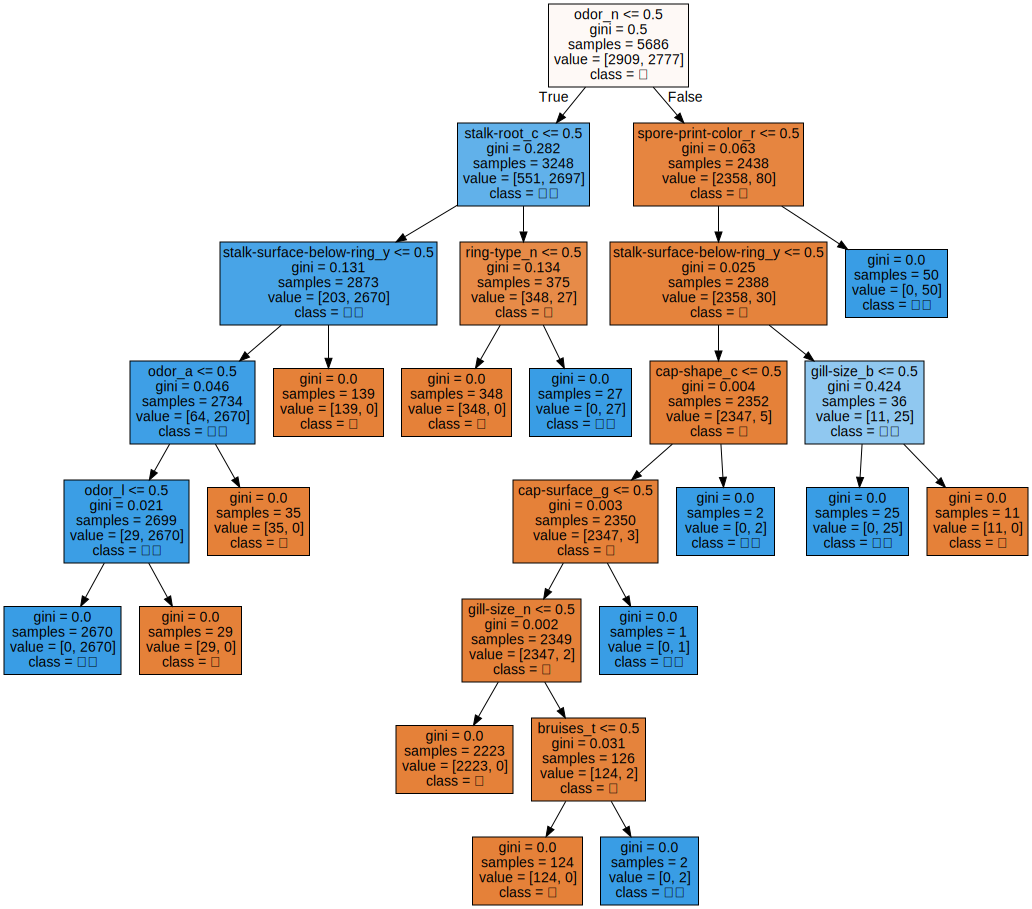

In [31]:
import graphviz

# tree01.dot 불러와서 인코딩 시켜주고 f로 저장
with open('tree01.dot', encoding='UTF8') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

### 모델 하이퍼 마라미터 수정

In [32]:
# max_depth 하이퍼 파라미터 수정
tree_mush02 = DecisionTreeClassifier(max_depth=3)

In [33]:
tree_mush02.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [34]:
pred02 = tree_mush02.predict(X_test)

In [35]:
tree_mush02.score(X_test, y_test)

0.9835931091058244

In [36]:
export_graphviz(tree_mush02, # 학습된 모델이 저장된 변수
               out_file = 'tree02.dot', # 파일명 및 저장 경로 설정
               class_names=['독', '식용'], # 클래스'
                feature_names = X_one_hot.columns,               impurity=True, # 지니불순도 표시여부
                filled=True # 노드에 색상 채우기 여부
               )

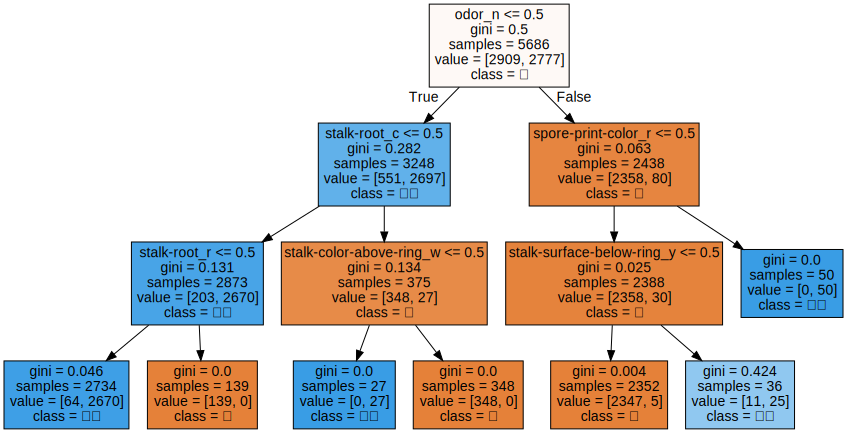

In [37]:
# tree02.dot 불러와서 인코딩 시켜주고 f로 저장
with open('tree02.dot', encoding='UTF8') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

### 특성 중요도 살펴보기

In [38]:
tree_mush01.feature_importances_

array([0.00000000e+00, 1.40293726e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.02364503e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.38537833e-03, 2.37999709e-02, 0.00000000e+00,
       0.00000000e+00, 2.01926645e-02, 0.00000000e+00, 6.23503261e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.37672033e-03,
       2.11462395e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.71611537e-01, 0.00000000e+00, 0.00000000e+00,
      

In [42]:
# 가시성을 위해 판다스의 데이터 프레임화 시켜주기
fi = pd.DataFrame(tree_mush01.feature_importances_)
# 인덱스 설정하기
fi.set_index(X_one_hot.columns, inplace=True)
fi

,0
cap-shape_b,0.000000
cap-shape_c,0.001403
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [45]:
# 특성 중요도를 내림차순으로 정렬해보자
fi.sort_values(by=0, ascending=False)

,0
odor_n,0.623503
stalk-root_c,0.171612
stalk-surface-below-ring_y,0.100757
spore-print-color_r,0.033611
odor_a,0.023800
...,...
gill-color_g,0.000000
gill-color_e,0.000000
gill-color_b,0.000000
gill-spacing_w,0.000000


- 현재 버섯데이터는 odor_n이라는 컬럼이 특성 중요도가 가장 높다(62%)
- 특성 중요도 -> 정답을 예측하는데 있어서 얼마나 영향을 미치고 있나?
- 특성 중요도가 가장 높은 데이터를 질문으로 던져서 분류를 진행했을때 효율적으로 데이터를 분류해 나갈 수 있다.

### 교차검증
- 모델에 일반화 성능 기대값을 알아보는 기능
- 교차검증을 이용해서 모델의 일반화 성능 기대값을 알아보는 용도

In [46]:
# 모듈 불러오기
from sklearn.model_selection import cross_val_score

In [49]:
# 모듈 사용해보기
# cross_val_score(모델 객체, 훈련용 문제 데이터, 훈련용 정답 데이터, 몇등분?)
rs = cross_val_score(tree_mush01, X_train, y_train, cv=5)
# 평균값 구해주기
print(rs)
print(rs.mean())

[1.         1.         1.         0.99912049 1.        ]
0.9998240985048372
